In [33]:
#check to see that it worked
train.funder.unique()
#yes

array(['other', 'rwssp', 'danida', 'hesawa', 'gov', 'world_bank'],
      dtype=object)

In [59]:
train.groupby(['funder', 'installer']).size()

funder      installer
danida      commu            8
            danida        1046
            dwe            626
            gov             13
            other         1415
            rwe              6
gov         commu          261
            dwe           4254
            gov           1607
            other         2317
            rwe            645
hesawa      dwe           1296
            gov             11
            other          894
            rwe              1
other       commu          766
            danida           4
            dwe          10160
            gov            125
            other        30679
            rwe            543
rwssp       dwe            914
            gov             12
            other          448
world_bank  commu           25
            dwe            152
            gov             57
            other         1104
            rwe             11
dtype: int64

<Figure size 1296x720 with 0 Axes>

other         42277
gov            9084
danida         3114
hesawa         2202
rwssp          1374
world_bank     1349
Name: funder, dtype: int64

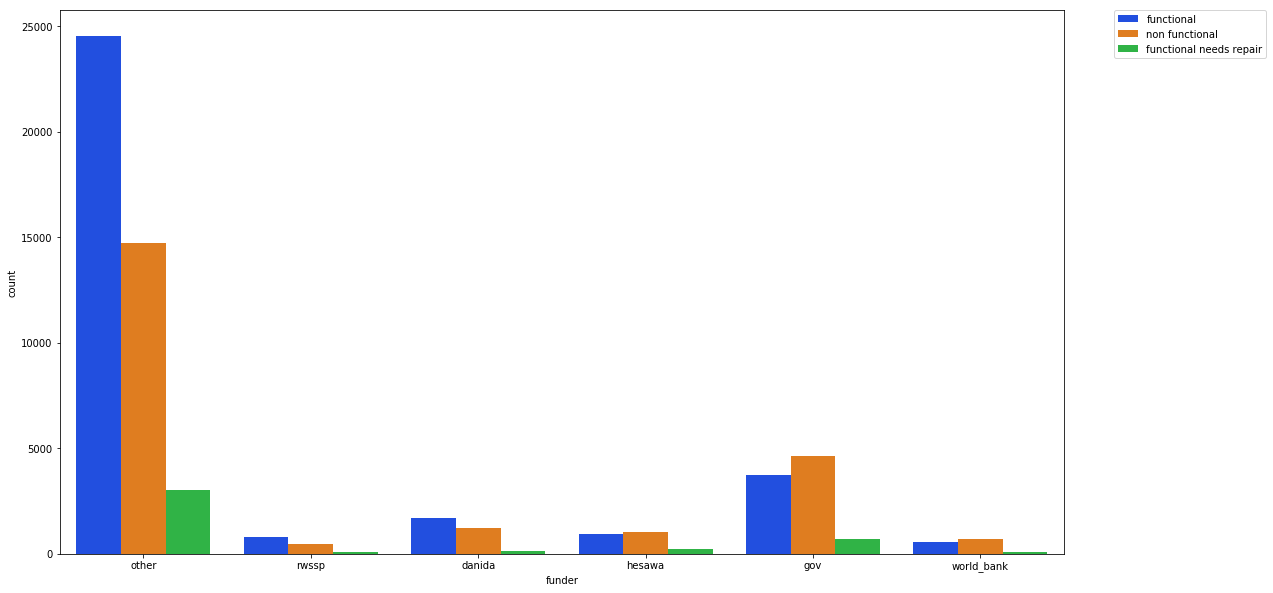

In [7]:
#now lets visualize funder
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='funder',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.funder.value_counts()
# px.histogram(train, x='funder', color='status_group', title='Who Paid for These Wells?', template='plotly_dark')

In [61]:
#funder seems to have differences, especially within the named categories, the government isn't doing to well

<Figure size 1296x720 with 0 Axes>

other     36857
dwe       17402
gov        1825
rwe        1206
commu      1060
danida     1050
Name: installer, dtype: int64

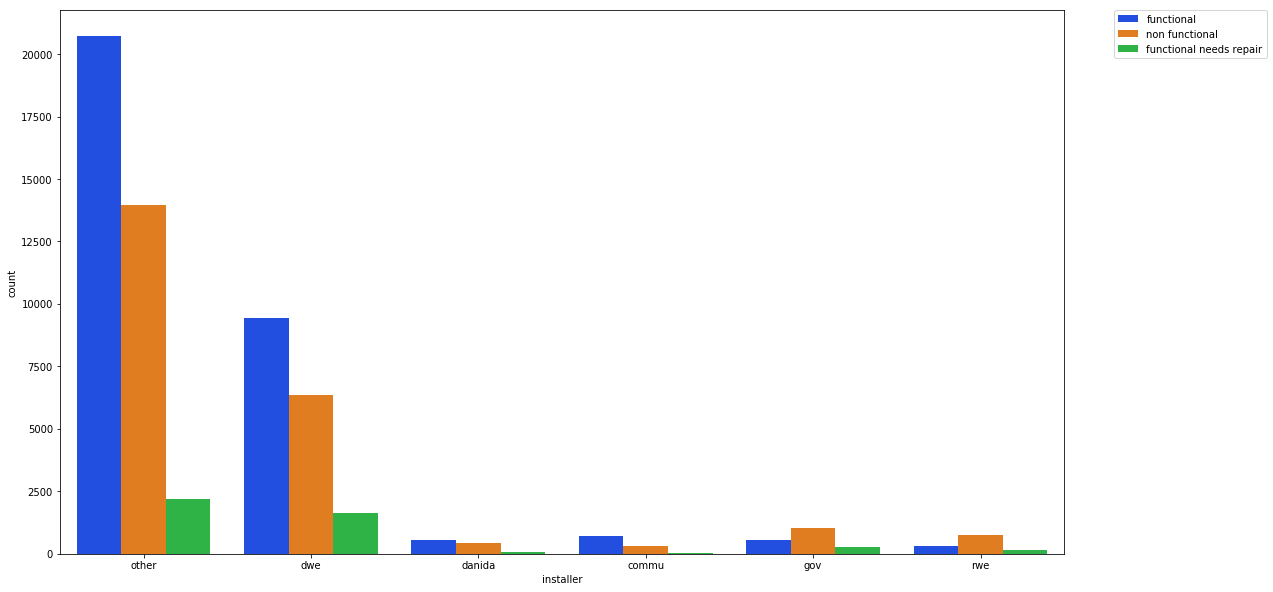

In [8]:
#now lets look at installer
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='installer',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.installer.value_counts()
# px.histogram(train, x='installer', color='status_group', title='Who Installed These Pumps?', template='plotly_dark')

In [63]:
#dwe has a higher percentage of relative success, again, the gov. is falling short

In [64]:
#lets look at the nans, we should probably code the missing nans within public meeting and permit 
train.isna().sum()

date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
population               0
public_meeting        3334
scheme_name          28166
permit                3056
construction_year        0
extraction_type          0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

__We need to replace the NAs in these columns below with a value "unknown" becuase we cannot remove rows in the new prediction data (when submitting this model to the competition, we are not allowed to remove rows)__

In [8]:
#lets replace scheme_name, permit and public meeting nans with 'unknown'
train['permit'].replace(np.nan, 'Unknown', inplace=True)
train['public_meeting'].replace(np.nan, 'Unknown', inplace=True)
train['scheme_name'].replace(np.nan, 'Unknown', inplace=True)

In [81]:
#make sure that it worked
train.isna().sum()
train['permit'].unique()
train['public_meeting'].unique()
train['scheme_name'].unique()

date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

array([False, True, 'Unknown'], dtype=object)

array([True, 'Unknown', False], dtype=object)

array(['Roman', 'Unknown', 'Nyumba ya mungu pipe scheme', ...,
       'BL Nsherehehe', 'Magati  gravity spri', 'Mtawanya'], dtype=object)

# Numeric Data Cleaning

In [67]:
#lets look at our remaining missing values, we need to consider how to treat these
train.isna().sum()
train[train==0].count()

date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

date_recorded            0
funder                   0
gps_height           20438
installer                0
longitude             1812
latitude                 0
basin                    0
region                   0
district_code           23
lga                      0
population           21381
public_meeting        5055
scheme_name              0
permit               17492
construction_year    20709
extraction_type          0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

We could choose to impute the overall mean or median for these values, since I ran the model once with the means and the medians, I know that the medians for all three of these work better than the means. In addition, there is a much more precise way of imputing rather than using one value for every missing value. We will begin by looking at our four categorical variables that are currently missing data, gps_height, longitude, population, and construction_year, grouped by their median values. 

In [68]:
pop_medians = train['population'].groupby(train['district_code'])
gps_medians = train['gps_height'].groupby(train['district_code'])
year_medians = train['construction_year'].groupby(train['district_code'])
long_medians = train['longitude'].groupby(train['district_code'])
pop_medians.median()
gps_medians.median()
year_medians.median()
long_medians.median()
# tsh_medians = train['amount_tsh'].groupby(train['district_code'])
# tsh_medians.median()

district_code
0       0.0
1       5.0
2     100.0
3      50.0
4      30.0
5      50.0
6       0.0
7       1.0
8       0.0
13    300.0
23     24.0
30      0.0
33      1.0
43    350.0
53      1.0
60     35.0
62    400.0
63     86.0
67     15.5
80      0.0
Name: population, dtype: float64

district_code
0        0.0
1      518.0
2     1019.0
3      306.0
4      905.0
5      698.0
6        0.0
7     1015.0
8        0.0
13      33.0
23      91.0
30       0.0
33     348.5
43      61.0
53     112.0
60     -18.0
62      13.0
63     310.0
67     -26.0
80       0.0
Name: gps_height, dtype: float64

district_code
0        0
1     1990
2     1990
3     1985
4     1982
5     1988
6        0
7     1984
8        0
13    1997
23    2008
30       0
33    1989
43    2006
53    2003
60       0
62    1999
63    1986
67       0
80       0
Name: construction_year, dtype: int64

district_code
0     36.700402
1     35.533367
2     34.774940
3     34.179510
4     34.712542
5     35.784020
6     34.153484
7     36.105420
8     33.562773
13    39.185480
23    39.448954
30    30.710775
33    39.046767
43    39.129413
53    38.958142
60    39.666581
62    39.593148
63    38.507951
67    39.740539
80    34.020668
Name: longitude, dtype: float64

# Imputing Missing Data
The cell below imputes the medians of our population, gps_height, and construction_year through a groupby() methodology. We are essentially using the means of these columns, organized by district_code, to impute the missing values. Since we have missing values left over after that, due to district_code having missing values in itself, we will replace the remaining missing values with the overall median of the feature. I ran this model several different times with the numeric features filled in with the mean, median, and several log transformations. We are trying to normalize the data using log transformations. After looking at model performance across these various test runs, it became apparent that only taking the log of population was necessary, and that all imputations should be median rather than mean
- the code for the median imputation works by initially grouping the means of district_code by population
- once those means are identified, a function is created using lambda to transform the column

We are also replacing the populations of 1 in our popultaion feature, this was an intuitive decision, there are probably not any people that live alone in the wilderness that have pumps installed by funding groups for them, just a thought, and the model performed better when we imputed for 1 and 0 population values

In [10]:
train['population'] = train.groupby('district_code').population.transform(lambda x: x.replace(0, x.median()))
train['population'] = train.groupby('district_code').population.transform(lambda x: x.replace(1, x.median()))
train['population'].replace(0, np.median(train['population']), inplace=True)
train['population'] = np.log(train['population'])


#log skewed the distribution of this data left
train['gps_height'] = train.groupby('district_code').gps_height.transform(lambda x: x.replace(0, x.median()))
train['gps_height'].replace(0, np.median(train['gps_height']), inplace=True)

#log didn't make sense here, we would have had to transform the latitude as well and the dist. weren't different
train['longitude'] = train.groupby('district_code').longitude.transform(lambda x: x.replace(0, x.median()))
train['longitude'].replace(0, np.median(train['longitude']), inplace=True)

#the log of this is weird, don't need to transform
train['construction_year'] = train.groupby('district_code').construction_year.transform(lambda x: x.replace(0, x.median()))
train['construction_year'].replace(0, np.median(train['construction_year']), inplace=True)

# train['amount_tsh'] = train.groupby('district_code').amount_tsh.transform(lambda x: x.replace(0, x.mean()))
# train['amount_tsh'].replace(0, np.mean(train['amount_tsh']), inplace=True)

We need to check to see if the data was imputed properly, indeed it was! Groovy

In [142]:
train.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,public_meeting,scheme_name,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,3/14/2011,other,1390,other,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,4.691348,True,Roman,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,3/6/2013,other,1399,other,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,5.634790,Unknown,Unknown,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2/25/2013,other,686,other,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,5.521461,True,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,1/28/2013,other,263,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,4.060443,True,Unknown,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,7/13/2011,other,518,other,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,1.609438,True,Unknown,True,1990,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


__We are using cufflinks here (you can tell becuase we use the .iplot instead of px.'plot' that accompanies plotly_express, this is also very intuitive with you being able to specify what kind of plot you want in the kind='' argument, pressing shift + tab will show you all the arguments available within the cufflink visualization function__

We are looking at the distributions of the data, we looked at this prior to transforming the features above and the distributions were quite ugly, the plots below show that, although some are far from normally distributed, the distributions are better than they were before we transformed the data, especially the log transformation of population

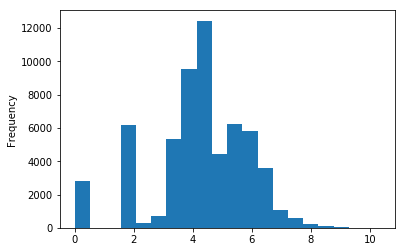

In [11]:
train.population.plot.hist(bins=20)
# train['population'].iplot(kind='hist')

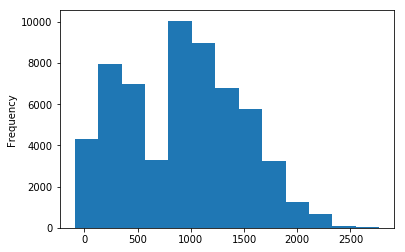

In [12]:
train.gps_height.plot.hist(bins=13)
# train['gps_height'].iplot(kind='hist')

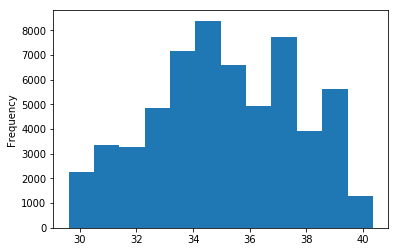

In [13]:
train.longitude.plot.hist(bins=12)
# train['longitude'].iplot(kind='hist')

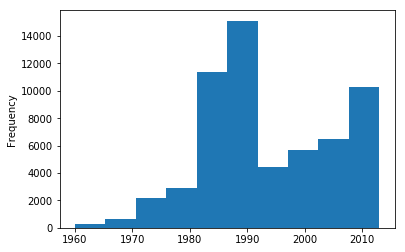

In [14]:
train.construction_year.plot.hist()
# train['construction_year'].iplot(kind='hist')

# NUMERIC FEATURE DATA VISUALIZATION

Now that we have imputed for missingness, we can start looking at how these numeric features relate to our labels. We are going to use two methods to visualize this data.
1. We are going to use Kernel Density Plots
2. We are also going to use Boxplots

We are going to look at the features in this order
- population by status_group
- construction_year by status_group
- gps_height by status_group
- latitude by status_group
- longitude by status_group

C:\Users\Sam Cannon\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



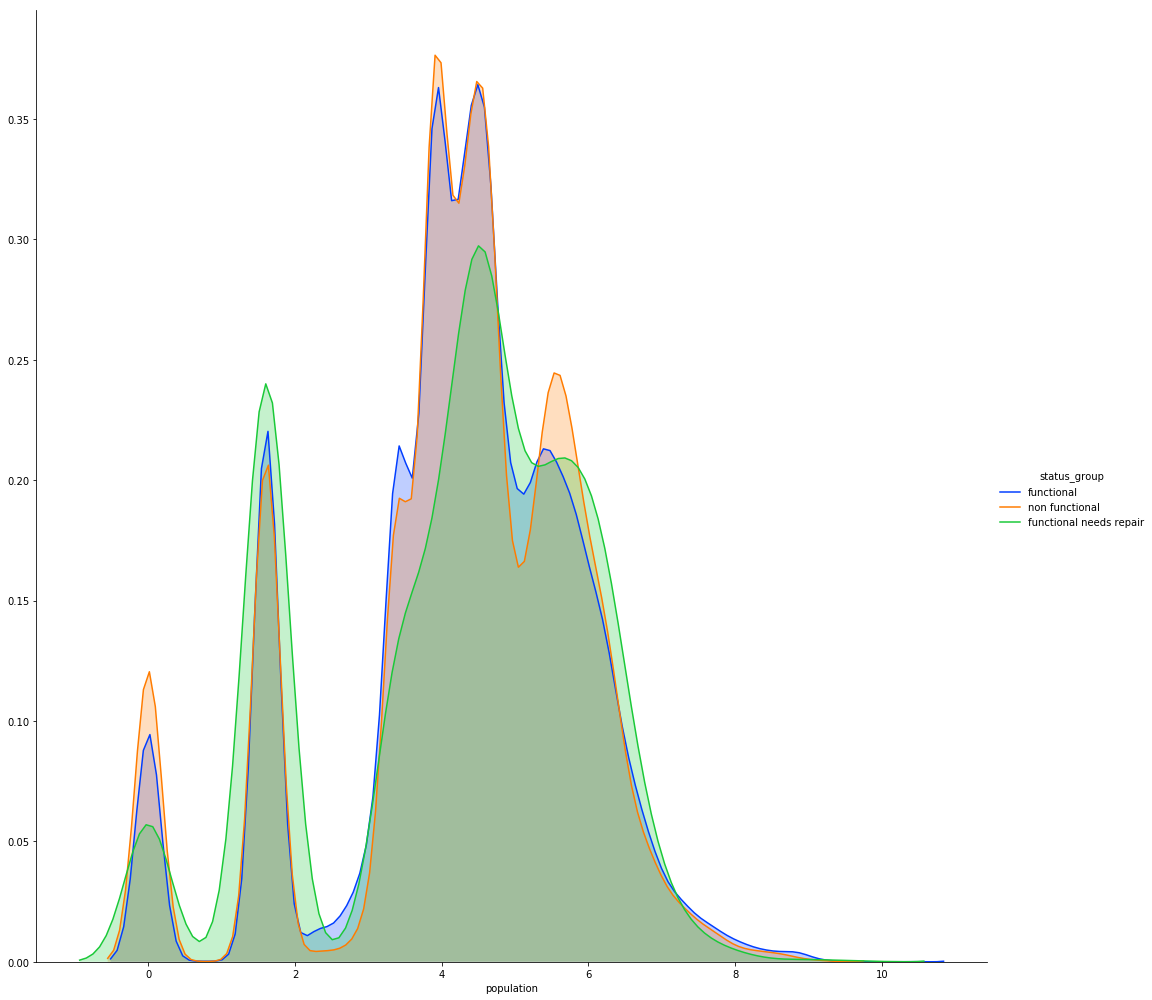

In [83]:
(sns.FacetGrid(train, hue='status_group',size=14, palette='bright').map(sns.kdeplot, 'population', shade=True).add_legend())

__These plots for population are showing us that there isn't that much difference between the labels and our population, but it still seems like a variable that we want to keep in the model intuitively...__

C:\Users\Sam Cannon\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



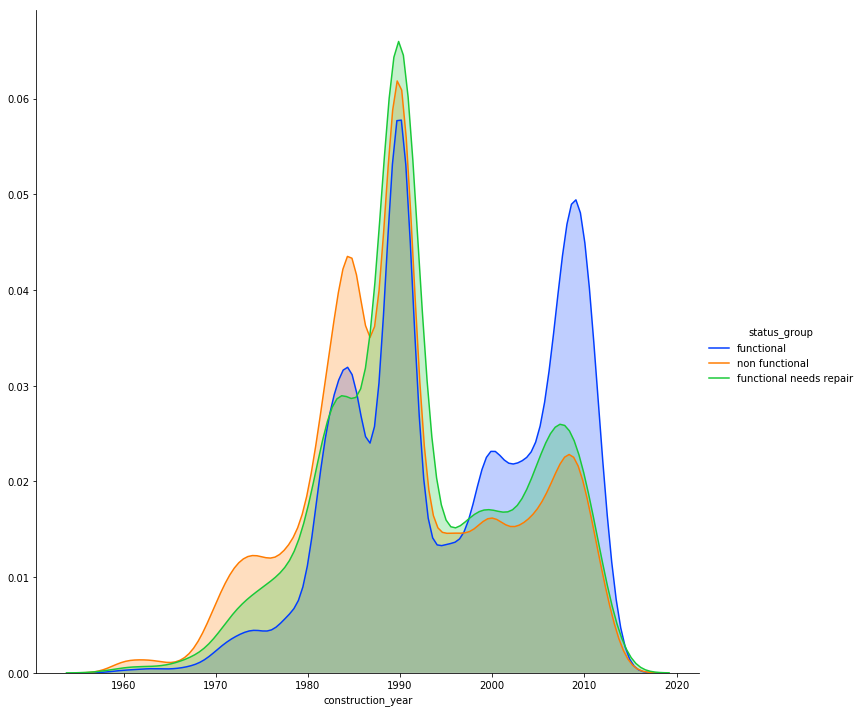

In [78]:
(sns.FacetGrid(train, hue='status_group',size=10, palette='bright').map(sns.kdeplot, 
                                                                       'construction_year', shade=True).add_legend())

__These plots for construction_year are suggesting (something that seems intuitive) that the newer pumps are functioning more than the older ones...Surprise!__

C:\Users\Sam Cannon\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



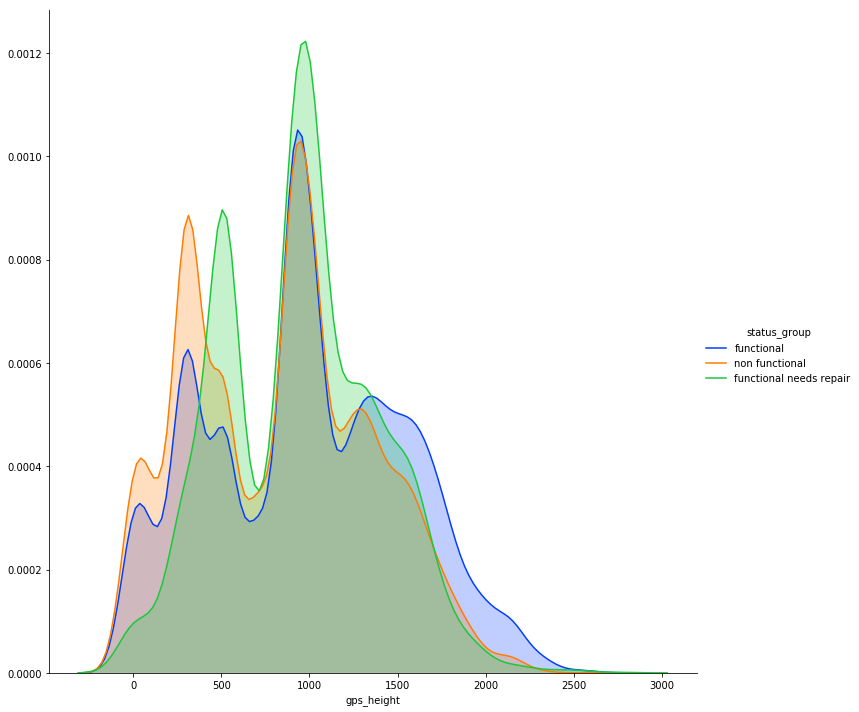

In [80]:
(sns.FacetGrid(train, hue='status_group',size=10, palette='bright').map(sns.kdeplot, 'gps_height', shade=True).add_legend())

__These plots for gps_height are showing that the functional pumps are located a little higher up in altitude than the non-functional pumps, interesting becuase we were thinking that this might be an opposite effect with lower pumps being able to have easier access to water__

C:\Users\Sam Cannon\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



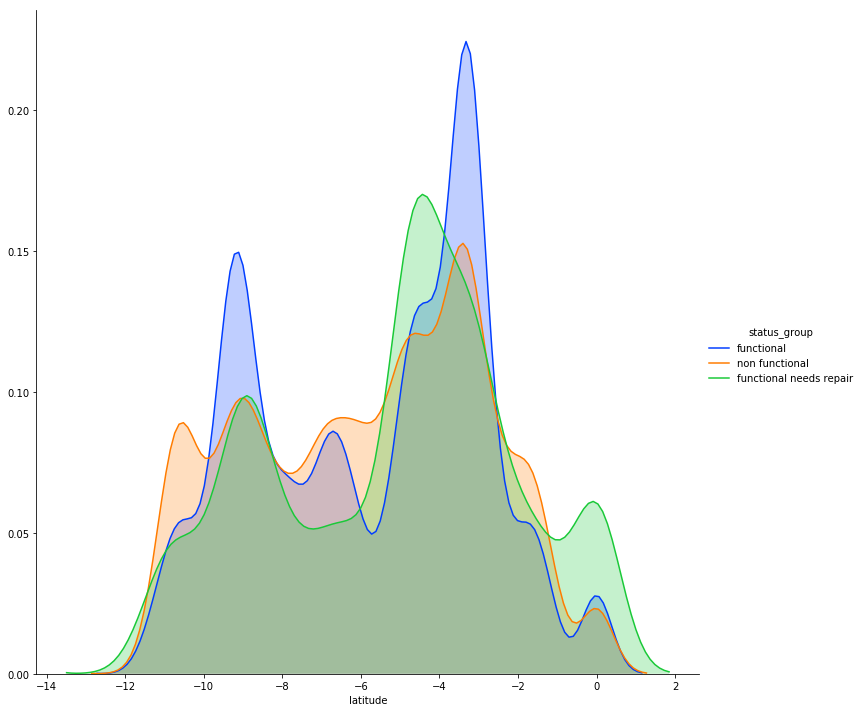

In [82]:
(sns.FacetGrid(train, hue='status_group',size=10, palette='bright').map(sns.kdeplot, 'latitude', shade=True).add_legend())

__These plots for latitude are showing that the higher latitude pumps are functioning a little more than the lower ones__

C:\Users\Sam Cannon\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



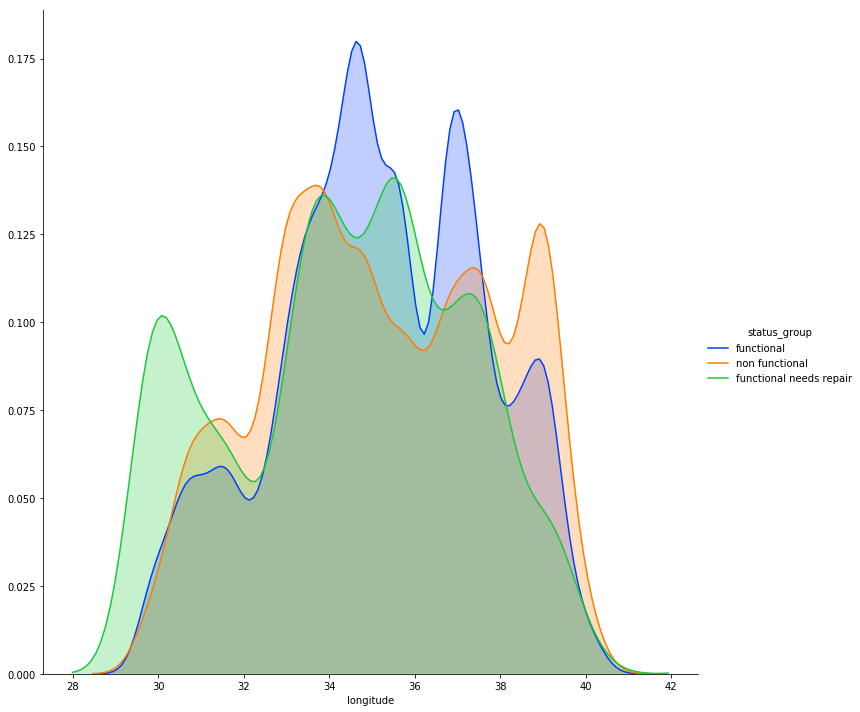

In [47]:
(sns.FacetGrid(train, hue='status_group',size=10, palette='bright').map(sns.kdeplot, 'longitude', shade=True).add_legend())

__These plots for longitude are showing that there is little difference in terms of this feature and the functionality of the pumps, but the gps data seems like something that we should include in our model nonetheless__

# Shape New Prediction Data

__We now have to shape our prediction data (the dataset that our model will be evaluated on for any competition entry) in the same exact ways that we shaped our training data, everything fom this point forward until our modeling will be the same process that we stepped through for the training data__

In [10]:
#tried this model with and without amount_tsh
test.drop(['id', 'recorded_by', 'num_private', 'waterpoint_type_group', 'source_type', 'source_class', 
           'quantity_group', 'quality_group', 'payment_type',
           'management_group', 'extraction_type_group', 'extraction_type_class', 'region_code', 
          'subvillage', 'scheme_management', 'wpt_name', 'ward', 'amount_tsh'], axis=1, inplace=True)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 22 columns):
date_recorded        14850 non-null object
funder               13981 non-null object
gps_height           14850 non-null int64
installer            13973 non-null object
longitude            14850 non-null float64
latitude             14850 non-null float64
basin                14850 non-null object
region               14850 non-null object
district_code        14850 non-null int64
lga                  14850 non-null object
population           14850 non-null int64
public_meeting       14029 non-null object
scheme_name          7758 non-null object
permit               14113 non-null object
construction_year    14850 non-null int64
extraction_type      14850 non-null object
management           14850 non-null object
payment              14850 non-null object
water_quality        14850 non-null object
quantity             14850 non-null object
source               14850 non-nul

In [12]:
#reduce the funder feature into less categories
# Use our previous function 
test['funder'] = train.apply(lambda row: purple_donkey(row), axis=1)

In [13]:
#reduce the installer feature into less categories
# Use our previous function 
test['installer'] = train.apply(lambda row: cheese_soup(row), axis=1)

**replace nas with unknown in these**

In [14]:
#lets replace scheme_name, permit and public meeting nans with 'unknown'
test['permit'].replace(np.nan, 'Unknown', inplace=True)
test['public_meeting'].replace(np.nan, 'Unknown', inplace=True)
test['scheme_name'].replace(np.nan, 'Unknown', inplace=True)

In [14]:
test.isna().sum()

date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
waterpoint_type      0
dtype: int64

__Same as training set for numeric features that we are keeping__

In [15]:
test['population'] = test.groupby('district_code').population.transform(lambda x: x.replace(0, x.median()))
test['population'].replace(0, np.mean(test['population']), inplace=True)
test['population'] = np.log(test['population'])

test['gps_height'] = test.groupby('district_code').gps_height.transform(lambda x: x.replace(0, x.median()))
test['gps_height'].replace(0, np.median(test['gps_height']), inplace=True)

test['longitude'] = test.groupby('district_code').longitude.transform(lambda x: x.replace(0, x.median()))
test['longitude'].replace(0, np.median(test['longitude']), inplace=True)

test['construction_year'] = test.groupby('district_code').construction_year.transform(lambda x: x.replace(0, x.median()))
test['construction_year'].replace(0, np.median(test['construction_year']), inplace=True)

# test['amount_tsh'] = test.groupby('district_code').amount_tsh.transform(lambda x: x.replace(0, x.mean()))
# test['amount_tsh'].replace(0, np.mean(test['amount_tsh']), inplace=True)

__Our training set should have only one more column than our test "predictions" set, the label column__

In [16]:
test.shape
train.shape

(14850, 22)

(59400, 23)